In [1]:
# OpenCV-Python library used for computer vision and image processing tasks. 
# It provides various functions for image and video processing.
import cv2

# Cross-platform framework for building multimodal applied machine learning pipelines. 
#In this code, it is used to detect hands in images and videos. ref. https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
import mediapipe as mp

# This module provides functionality to read from and write to CSV (comma-separated value) files.
import csv

# This module supplies classes to work with dates and times.
from datetime import datetime

# This is a Python module used for automating web browsers.
# It provides a way to interact with web pages through automated scripts.
from selenium import webdriver

# This is a sub-module of the mediapipe module and provides drawing utilities for use with the Mediapipe framework.
mp_drawing = mp.solutions.drawing_utils

# This is another sub-module of the mediapipe module and provides hand detection functionality using the Mediapipe framework.
mp_hands = mp.solutions.hands

# This code defines a function called "recognizeHandGesture", which takes in a list of "landmarks" as its input parameter. 
# These landmarks represent the coordinates of various points on a hand that have been detected by a computer vision algorithm.
def recognizeHandGesture(landmarks):
    
    # The function first initializes variables to represent the state of each finger, with a default value of "UNKNOW". 
  thumbState = 'UNKNOW'
  indexFingerState = 'UNKNOW'
  middleFingerState = 'UNKNOW'
  ringFingerState = 'UNKNOW'
  littleFingerState = 'UNKNOW'
  recognizedHandGesture = None
    
    # It then checks the position of each finger with respect to a "pseudo-fix key point" on the hand, which is the second landmark in the list. 
  pseudoFixKeyPoint = landmarks[2]['x']
  if (landmarks[3]['x'] < pseudoFixKeyPoint and landmarks[4]['x'] < landmarks[3]['x']):
    # Based on the position of each finger, the state variable for that finger is updated to either "OPEN" or "CLOSE".
    thumbState = 'CLOSE'
  elif (pseudoFixKeyPoint < landmarks[3]['x'] and landmarks[3]['x'] < landmarks[4]['x']):
    thumbState = 'OPEN'

  pseudoFixKeyPoint = landmarks[6]['y']
  if (landmarks[7]['y'] < pseudoFixKeyPoint and landmarks[8]['y'] < landmarks[7]['y']):
    indexFingerState = 'OPEN'
  elif (pseudoFixKeyPoint < landmarks[7]['y'] and landmarks[7]['y'] < landmarks[8]['y']):
    indexFingerState = 'CLOSE'

  pseudoFixKeyPoint = landmarks[10]['y']
  if (landmarks[11]['y'] < pseudoFixKeyPoint and landmarks[12]['y'] < landmarks[11]['y']):
    middleFingerState = 'OPEN'
  elif (pseudoFixKeyPoint < landmarks[11]['y'] and landmarks[11]['y'] < landmarks[12]['y']):
    middleFingerState = 'CLOSE'

  pseudoFixKeyPoint = landmarks[14]['y']
  if (landmarks[15]['y'] < pseudoFixKeyPoint and landmarks[16]['y'] < landmarks[15]['y']):
    ringFingerState = 'OPEN'
  elif (pseudoFixKeyPoint < landmarks[15]['y'] and landmarks[15]['y'] < landmarks[16]['y']):
    ringFingerState = 'CLOSE'

  pseudoFixKeyPoint = landmarks[18]['y']
  if (landmarks[19]['y'] < pseudoFixKeyPoint and landmarks[20]['y'] < landmarks[19]['y']):
    littleFingerState = 'OPEN'
  elif (pseudoFixKeyPoint < landmarks[19]['y'] and landmarks[19]['y'] < landmarks[20]['y']):
    littleFingerState = 'CLOSE'

    # The first conditional statement checks if all fingers are open and assigns the recognized hand gesture as 5.
  if (thumbState == 'OPEN' and indexFingerState == 'OPEN' and middleFingerState == 'OPEN' and ringFingerState == 'OPEN' and littleFingerState == 'OPEN'):
    recognizedHandGesture = 5
    
    # The second conditional statement checks if the thumb is closed while all other fingers are open and assigns the recognized hand gesture as 4.
  elif (thumbState == 'CLOSE' and indexFingerState == 'OPEN' and middleFingerState == 'OPEN' and ringFingerState == 'OPEN' and littleFingerState == 'OPEN'):
    recognizedHandGesture = 4
    
    # The third conditional statement checks if the ring finger and little finger are closed while all other fingers are open and assigns the recognized hand gesture as 3.
  elif (thumbState == 'OPEN' and indexFingerState == 'OPEN' and middleFingerState == 'OPEN' and ringFingerState == 'CLOSE' and littleFingerState == 'CLOSE'):
    recognizedHandGesture = 3
    
    # The fourth conditional statement checks if the middle finger, ring finger, and little finger are closed while the thumb and index finger are open and assigns the recognized hand gesture as 2
  elif (thumbState == 'OPEN' and indexFingerState == 'OPEN' and middleFingerState == 'CLOSE' and ringFingerState == 'CLOSE' and littleFingerState == 'CLOSE'):
    recognizedHandGesture = 2
    
    # The fifth conditional statement checks if the index finger and ring finger are closed while all other fingers are open and assigns the recognized hand gesture as 10.
  elif (thumbState == 'OPEN' and indexFingerState == 'CLOSE' and middleFingerState == 'OPEN' and ringFingerState == 'CLOSE' and littleFingerState == 'CLOSE'):
    recognizedHandGesture = 10
    
    # The sixth conditional statement checks if the middle finger, ring finger, and little finger are closed while the thumb and index finger are open and assigns the recognized hand gesture as 7.
  elif (thumbState == 'OPEN' and indexFingerState == 'OPEN' and middleFingerState == 'CLOSE' and ringFingerState == 'CLOSE' and littleFingerState == 'OPEN'):
    recognizedHandGesture = 7
    
   # The seventh conditional statement checks if the index finger and middle finger are closed while all other fingers are open and assigns the recognized hand gesture as 6. 
  elif (thumbState == 'OPEN' and indexFingerState == 'CLOSE' and middleFingerState == 'CLOSE' and ringFingerState == 'CLOSE' and littleFingerState == 'OPEN'):
    recognizedHandGesture = 6
  else:
    # After all finger states have been determined, the function checks for specific combinations of finger states to determine the recognized hand gesture. 
    # If no recognized gesture is found, the function returns 0.
    recognizedHandGesture = 0
  return recognizedHandGesture




# This function takes in a list of landmarks and returns a structured list of landmarks. 
# Each landmark in the structured list is represented as a dictionary with keys 'x' and 'y', which correspond to the x and y coordinates of the landmark respectively.
def getStructuredLandmarks(landmarks):
    
    # The for loop iterates through the list of landmarks and checks if the index is odd (i.e. j % 2 == 1). If it is odd, it creates a dictionary with keys 'x' and 'y' and values equal to the previous and current elements in the list, respectively. 
    # This dictionary is then appended to the structuredLandmarks list.
  structuredLandmarks = []
  for j in range(42):
    if( j %2 == 1):
      structuredLandmarks.append({ 'x': landmarks[j - 1], 'y': landmarks[j] })
  return structuredLandmarks




# create a CSV file and write header
csv_file = open("hand_gesture_data.csv", "w", newline="")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["timestamp", "gesture", "action", "landmarks"])

chromedriver = "chromedriver"
driver = webdriver.Chrome(chromedriver)

# "gesture_interface" that captures live video input from the user's webcam and recognizes hand gestures using the MediaPipe Hands library. 
def gesture_interface():
    
    driver.get('https://www.youtube.com/watch?v=09R8_2nJtjg')
    # The recognized hand gestures are mapped to certain actions that are performed on a YouTube video that is loaded in a web browser window opened by Selenium webdriver.
    driver.execute_script('document.getElementsByTagName("video")[0].play()')
    hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)
    cap = cv2.VideoCapture(0)
    i = 0
    c = 0
    
    # # the function uses MediaPipe Hands to detect and track hand landmarks in the current frame.
    # If any hand landmarks are detected, they are drawn on the frame using OpenCV.
    while cap.isOpened():
        l = []
        i += 1
        success, image = cap.read()
        if not success:
            break
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        o = results
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                c += 1
                for lp in hand_landmarks.landmark:
                    l.append(lp.x)
                    l.append(lp.y)
        cv2.imshow('MediaPipe Hands', image)
        
        # The function then passes the detected hand landmarks to another function named "recognizeHandGesture()" that returns a number corresponding to the recognized hand gesture.
        try:
            recognizedHandGesture = recognizeHandGesture(getStructuredLandmarks(l))
            print(recognizedHandGesture)
            action = ""
            if recognizedHandGesture == 5:
                driver.execute_script('document.getElementsByTagName("video")[0].pause()')
                action = "pause"
            elif recognizedHandGesture == 4:
                driver.execute_script('document.getElementsByTagName("video")[0].play()')
                action = "play"
            elif recognizedHandGesture == 3:
                driver.execute_script('document.getElementsByTagName("video")[0].playbackRate = 2')
                action = "speed 2x"
            elif recognizedHandGesture == 2:
                driver.execute_script('document.getElementsByTagName("video")[0].playbackRate = 1')
                action = "speed 1x"
                
             #  If a recognized hand gesture corresponds to an action on the YouTube video, the function uses Selenium to execute a JavaScript command that performs that action.
            #  The recognized hand gesture, action performed, and detected hand landmarks are then written to a CSV file.
            # write the data to CSV file
            csv_writer.writerow([datetime.now().strftime("%Y-%m-%d %H:%M:%S"), recognizedHandGesture, action, l])
            
        except:
            print('None')
        if cv2.waitKey(5) & 0xFF == 27:
            break
    hands.close()
    cap.release()
    csv_file.close()

gesture_interface()


ModuleNotFoundError: No module named 'cv2'

In [19]:
# Reading and displaying the CSV data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
# Read the CSV data into a pandas DataFrame
df = pd.read_csv('hand_gesture_data.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

             timestamp  gesture action  \
0  2023-04-29 21:01:13        0    NaN   
1  2023-04-29 21:01:14        0    NaN   
2  2023-04-29 21:01:14        0    NaN   
3  2023-04-29 21:01:14        4   play   
4  2023-04-29 21:01:14        4   play   

                                           landmarks  
0  [0.9390199780464172, 0.860045313835144, 0.8386...  
1  [0.9420972466468811, 0.8733319044113159, 0.841...  
2  [0.9310383200645447, 0.8304200172424316, 0.964...  
3  [0.8922770619392395, 0.7841624021530151, 0.950...  
4  [0.9005929827690125, 0.7858502864837646, 0.952...  


In [20]:
# Count the number of occurrences of each gesture
gesture_counts = df['gesture'].value_counts()

# Display the counts
print(gesture_counts)


0    292
4    290
5    136
3     53
2     46
7     21
Name: gesture, dtype: int64


In [21]:
# Group the data by gesture and action and count the number of occurrences
grouped_data = df.groupby(['gesture', 'action']).size().reset_index(name='count')

# Display the grouped data
print(grouped_data)


   gesture    action  count
0        2  speed 1x     46
1        3  speed 2x     53
2        4      play    290
3        5     pause    136


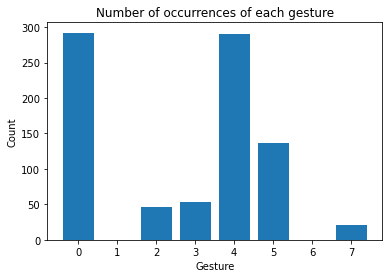

In [22]:
# Count the number of occurrences of each gesture
gesture_counts = df['gesture'].value_counts()

# Create a bar chart of the gesture counts
plt.bar(gesture_counts.index, gesture_counts.values)
plt.title('Number of occurrences of each gesture')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.show()


In [23]:
# Parse the timestamp column and extract the day of the week
df['day_of_week'] = df['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%A'))

# Display the first 5 rows of the DataFrame with the new day_of_week column
print(df.head())

             timestamp  gesture action  \
0  2023-04-29 21:01:13        0    NaN   
1  2023-04-29 21:01:14        0    NaN   
2  2023-04-29 21:01:14        0    NaN   
3  2023-04-29 21:01:14        4   play   
4  2023-04-29 21:01:14        4   play   

                                           landmarks day_of_week  
0  [0.9390199780464172, 0.860045313835144, 0.8386...    Saturday  
1  [0.9420972466468811, 0.8733319044113159, 0.841...    Saturday  
2  [0.9310383200645447, 0.8304200172424316, 0.964...    Saturday  
3  [0.8922770619392395, 0.7841624021530151, 0.950...    Saturday  
4  [0.9005929827690125, 0.7858502864837646, 0.952...    Saturday  


In [24]:
# Calculate the average number of landmarks per gesture
avg_landmarks = df.groupby('gesture')['landmarks'].apply(lambda x: x.str.count(',') + 1).mean()

# Display the average number of landmarks per gesture
print(avg_landmarks)


42.0


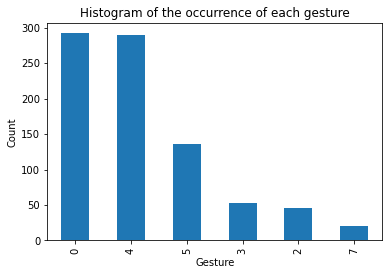

In [25]:
# Count the occurrence of each gesture
gesture_counts = df['gesture'].value_counts()

# Create a histogram of the occurrence of each gesture
gesture_counts.plot(kind='bar')
plt.title('Histogram of the occurrence of each gesture')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.show()

In [26]:
# Group the data by gesture and calculate the average number of landmarks and actions for each gesture
grouped_data = df.groupby('gesture').agg({'landmarks': lambda x: x.str.count(',') + 1, 'action': 'count'}).reset_index()

# Display the grouped and aggregated data
print(grouped_data)


   gesture                                          landmarks  action
0        0  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...       0
1        2  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...      46
2        3  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...      53
3        4  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...     290
4        5  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...     136
5        7  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...       0


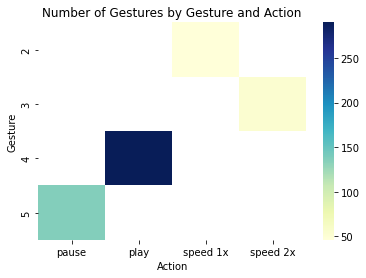

In [27]:
# Create a pivot table to calculate the number of gestures for each combination of gesture and action
pivot_table = pd.pivot_table(df, values='landmarks', index='gesture', columns='action', aggfunc='count')

# Generate the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Action')
plt.ylabel('Gesture')
plt.title('Number of Gestures by Gesture and Action')

# Show the plot
plt.show()